   ID  Age  Experience  Income  Zipcode  Family    CCAvg  Education  Mortgage  \
0   1   39          14  127000    49560       1   567.28          2     36000   
1   2   36           0   72000    63865       1  3927.17          1    341000   
2   3   37           5  147000    56686       2   369.79          1    326000   
3   4   55           4  199000    85910       4  3847.52          3    406000   
4   5   45          17  177000    14675       1    26.63          2    424000   

   Securities Account  CD Account  Online  CreditCard  Personal Loan  
0                   1           0       1           0              1  
1                   1           0       0           0              0  
2                   0           0       0           1              0  
3                   0           0       0           0              0  
4                   0           0       0           0              0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (t

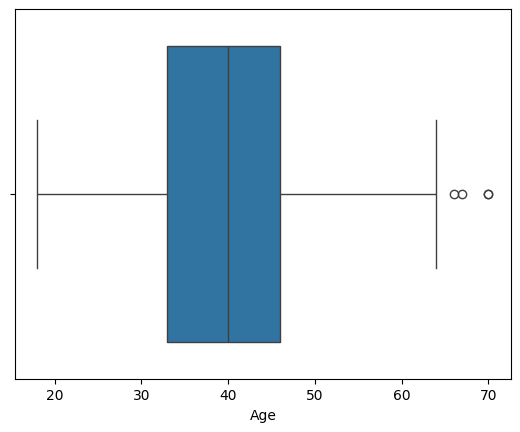

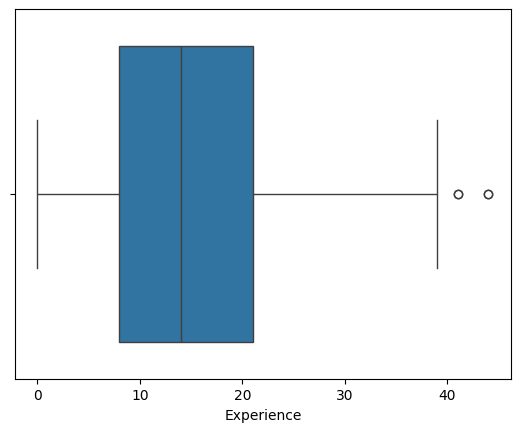

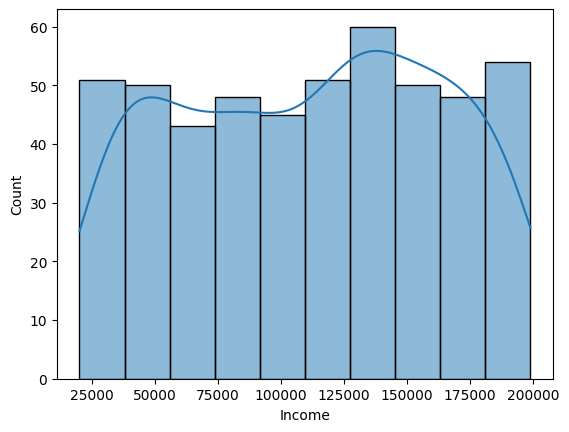

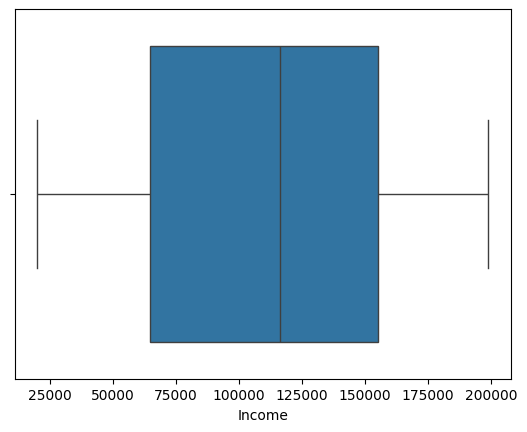

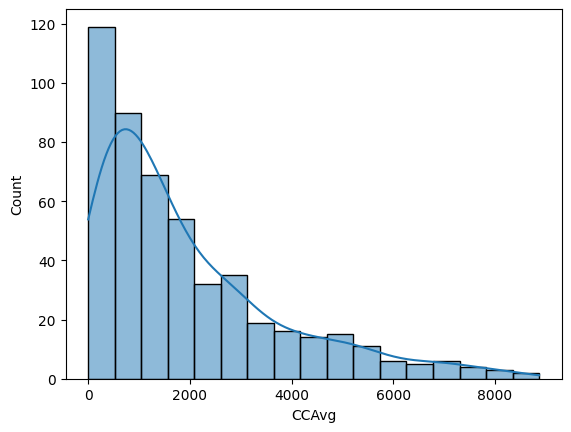

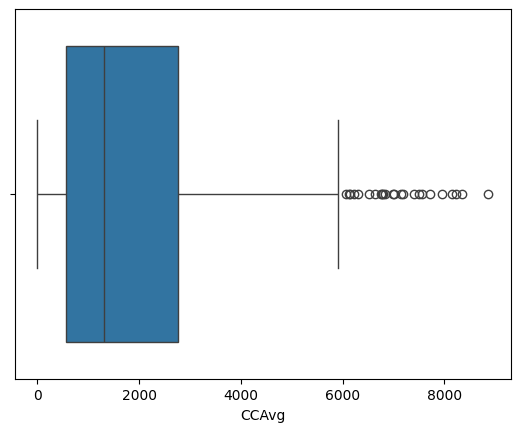

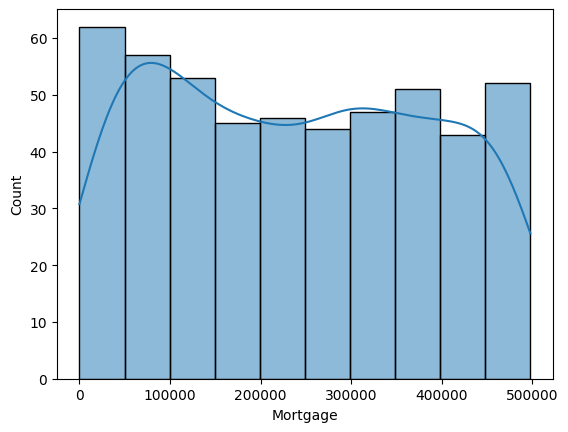

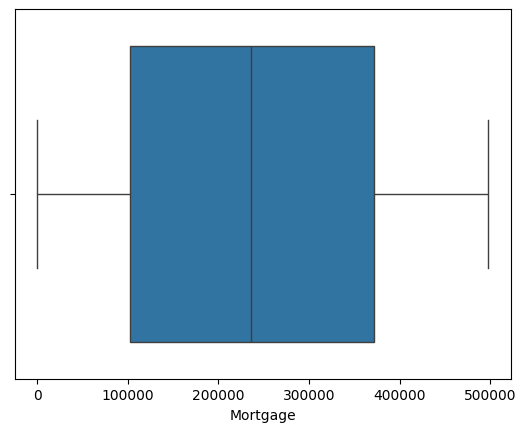

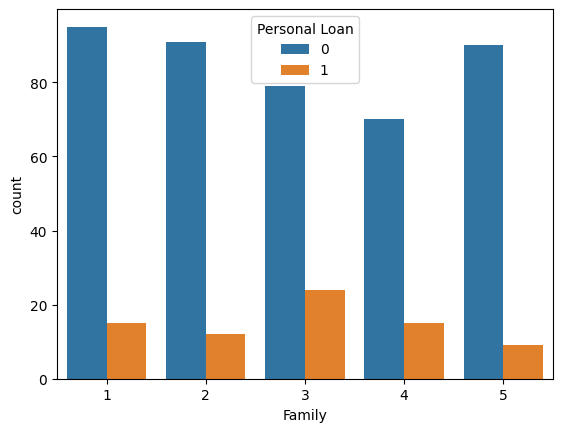

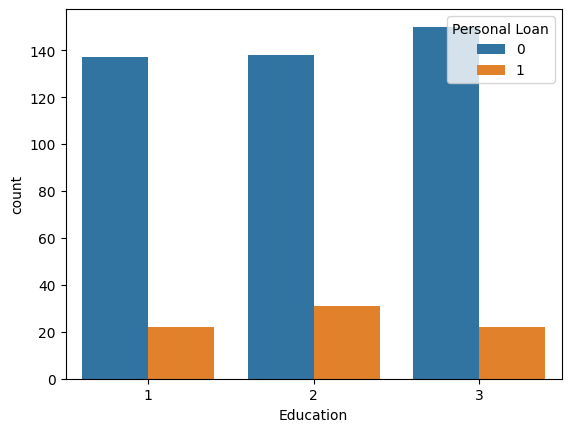

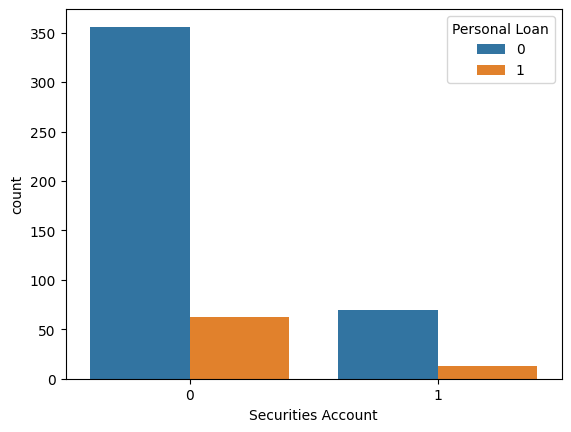

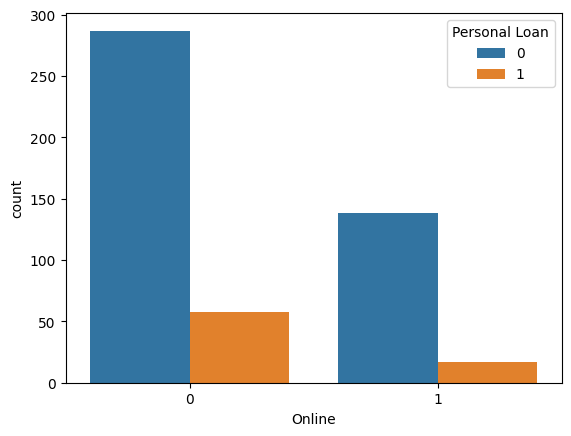

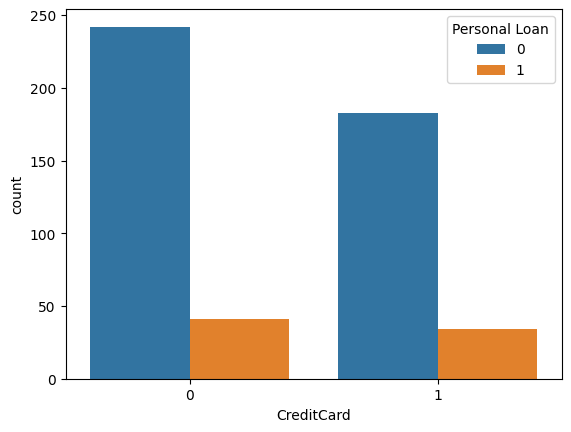

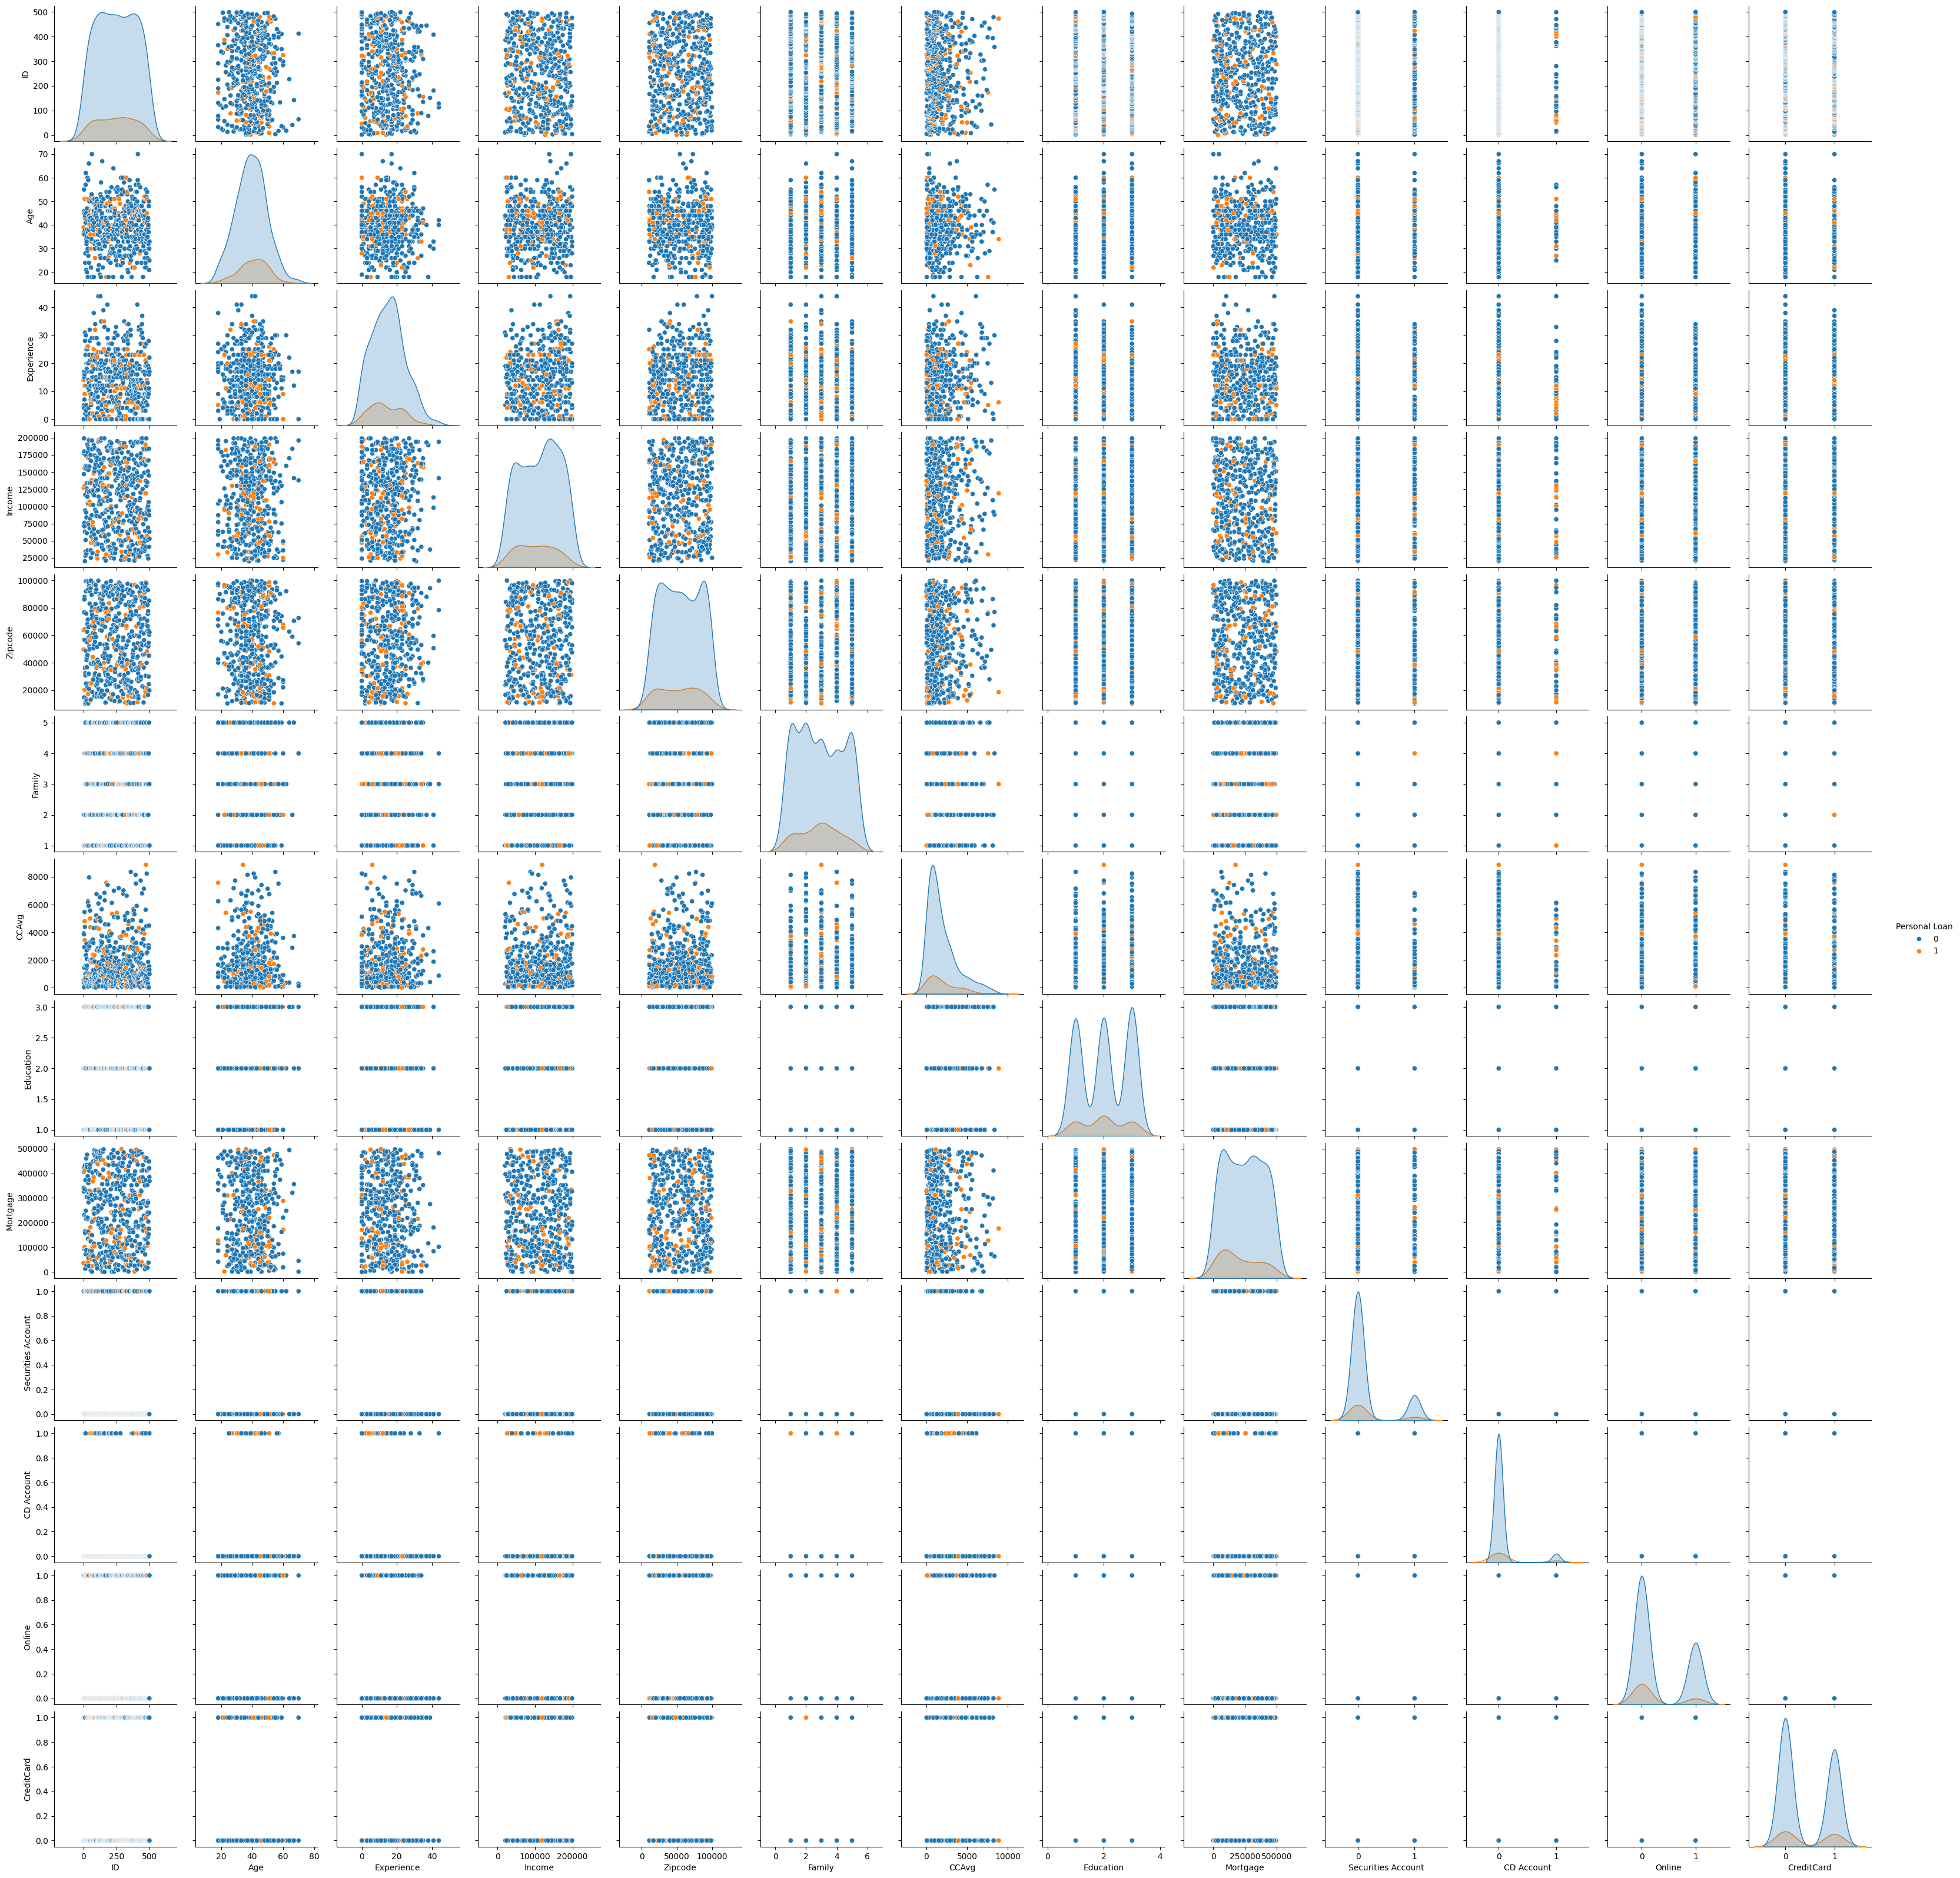

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4840 - loss: 2456.3057 - val_accuracy: 0.4853 - val_loss: 1075.3083
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4799 - loss: 1739.4778 - val_accuracy: 0.5147 - val_loss: 17.0168
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5348 - loss: 1214.6046 - val_accuracy: 0.5221 - val_loss: 1.7389
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4693 - loss: 957.5463 - val_accuracy: 0.4853 - val_loss: 403.5122
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5305 - loss: 583.1813 - val_accuracy: 0.4853 - val_loss: 10.6733
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5352 - loss: 581.7457 - val_accuracy: 0.5147 - val_loss: 201.4381
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4951 - loss: 494.0680 - val_accuracy: 0.4853 - val_loss: 30.4001
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4653 - loss: 426.7897 - val_accu

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

           0       0.49      1.00      0.66        83
           1       0.00      0.00      0.00        87

    accuracy                           0.49       170
   macro avg       0.24      0.50      0.33       170
weighted avg       0.24      0.49      0.32       170

[[83  0]
 [87  0]]
ROC AUC: 0.4675252735078244


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Misclassified Samples:
      Actual  Predicted
512       1   0.409494
357       0   0.406085
110       0   0.484153
684       1   0.495428
39        0   0.468883


PermutationExplainer explainer: 171it [00:32,  3.43it/s]
<ipython-input-17-854235851d6d>:82: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


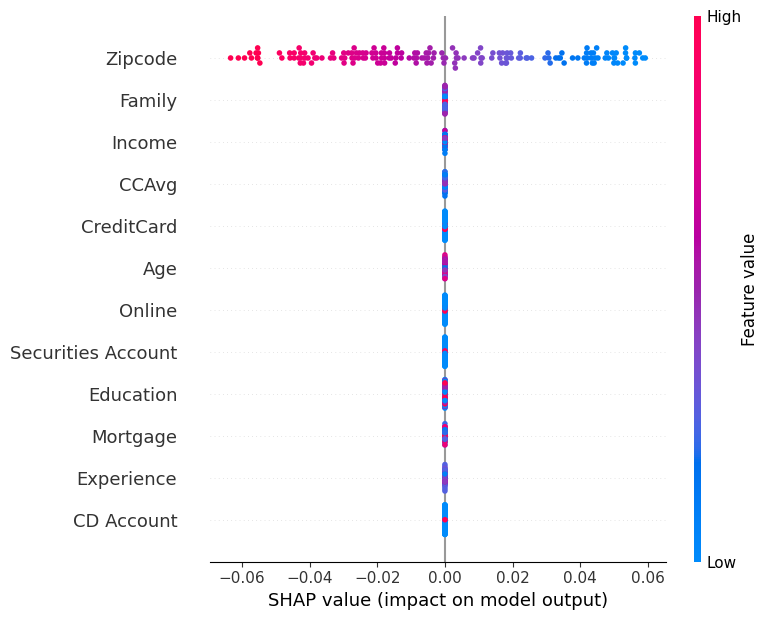

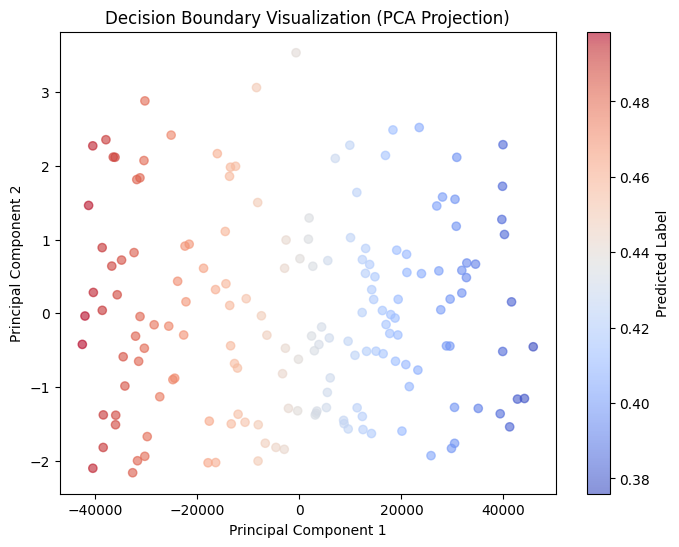

In [17]:

import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt




# . Load and inspect data
data = pd.read_csv('/content/Bank_customer_data.csv')
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())
print(data['Personal Loan'].value_counts())

# . EDA and Visualization
sns.countplot(x='Personal Loan', data=data); plt.show()
numerical_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for feature in numerical_features: sns.histplot(data[feature], kde=True); plt.show(); sns.boxplot(x=data[feature]); plt.show()
categorical_features = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for feature in categorical_features: sns.countplot(x=feature, hue='Personal Loan', data=data); plt.show()
sns.pairplot(data, hue='Personal Loan'); plt.show()

# . Data Preparation
data = data.drop(['ID', 'ZIP Code'], axis=1, errors='ignore')
smote = SMOTE(random_state=42)
X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']
X_resampled, y_resampled = smote.fit_resample(X, y)
data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Personal Loan')], axis=1)
scaler = StandardScaler()
numerical_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
data_resampled[numerical_cols] = scaler.fit_transform(data_resampled[numerical_cols])
X = data_resampled.drop('Personal Loan', axis=1)
y = data_resampled['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# . Model Building
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))
plt.plot(history.history['accuracy'], label='train_accuracy'); plt.plot(history.history['val_accuracy'], label='val_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(loc='lower right'); plt.show()

# . Evaluation Metrics
y_pred = model.predict(X_test); y_pred_binary = (y_pred > 0.5).astype(int).flatten()
print(classification_report(y_test, y_pred_binary)); print(confusion_matrix(y_test, y_pred_binary))
roc_auc = roc_auc_score(y_test, y_pred.flatten()); print(f'ROC AUC: {roc_auc}')
fpr, tpr, thresholds = roc_curve(y_test, y_pred.flatten()); plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})'); plt.plot([0, 1], [0, 1], 'k--'); plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('Receiver Operating Characteristic'); plt.legend(loc='lower right'); plt.show()




# Create a DataFrame with actual vs predicted labels
df_test_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred.flatten()})

# Find misclassified cases
misclassified = df_test_results[df_test_results["Actual"] != df_test_results["Predicted"]]
print("Misclassified Samples:\n", misclassified.head())

# Use the trained model 'model' instead of 'best_model'
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred.flatten(), cmap="coolwarm", alpha=0.6)
plt.title("Decision Boundary Visualization (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Predicted Label")
plt.show()